In [48]:
 #Filtering the warnings
import warnings
warnings.filterwarnings("ignore")

In [49]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

In [50]:
#Reading the dataset
df = pd.read_csv('unemployment_dataset.csv')
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [51]:
df.shape

(754, 7)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 41.4+ KB


In [53]:
print(df.isnull().sum())
df.head()

Region                                      14
 Date                                       14
 Frequency                                  14
 Estimated Unemployment Rate (%)            14
 Estimated Employed                         14
 Estimated Labour Participation Rate (%)    14
Area                                        14
dtype: int64


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [54]:
df = df.dropna()
df.shape
print(df.isnull().sum())
df.head()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [55]:
#Renaming the column names
df = df.rename(columns={' Date':'Date',' Frequency':'Frequency',' Estimated Unemployment Rate (%)':'Est_Unemp_Rate',' Estimated Employed':'Est_Emp_Rate',' Estimated Labour Participation Rate (%)':'Est_Labour_Rate'}).reset_index(drop = True)


#Rounding estimated employed column for a better visualizing
df['Est_Emp_Rate'] = round((df['Est_Emp_Rate']/1000000),2)
df.head()

,Region,Date,Frequency,Est_Unemp_Rate,Est_Emp_Rate,Est_Labour_Rate,Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,12.00,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11.76,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12.09,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12.29,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12.26,44.68,Rural


In [56]:
#Changing the dtype of 'Date' column
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Region           740 non-null    object        
 1   Date             740 non-null    datetime64[ns]
 2   Frequency        740 non-null    object        
 3   Est_Unemp_Rate   740 non-null    float64       
 4   Est_Emp_Rate     740 non-null    float64       
 5   Est_Labour_Rate  740 non-null    float64       
 6   Area             740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 40.6+ KB


In [57]:
#Checking if there are no duplicate rows in the data set
df.duplicated().sum()

np.int64(0)

In [58]:
#Check typo errors in the 'Frequency' column
df.Frequency.value_counts()

Frequency
Monthly     381
 Monthly    359
Name: count, dtype: int64

In [59]:
df = df.drop(['Frequency'],axis = 1)
df.shape

(740, 6)

In [60]:
#Create new columns for year and month to analyse between 2019 & 2020
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df.head()

,Region,Date,Est_Unemp_Rate,Est_Emp_Rate,Est_Labour_Rate,Area,Year,Month
0,Andhra Pradesh,2019-05-31,3.65,12.00,43.24,Rural,2019,5
1,Andhra Pradesh,2019-06-30,3.05,11.76,42.05,Rural,2019,6
2,Andhra Pradesh,2019-07-31,3.75,12.09,43.50,Rural,2019,7
3,Andhra Pradesh,2019-08-31,3.32,12.29,43.97,Rural,2019,8
4,Andhra Pradesh,2019-09-30,5.17,12.26,44.68,Rural,2019,9


In [61]:
#Analysing the area column
df.Area.value_counts(normalize = True)*100

Area
Urban    51.486486
Rural    48.513514
Name: proportion, dtype: float64

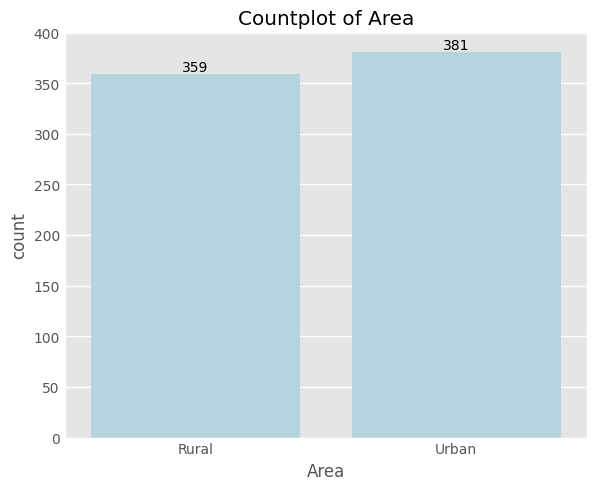

In [62]:
plt.figure(figsize = [6,5])
ax = sns.countplot(data = df, x = 'Area', palette = ['lightblue'])

plt.title("Countplot of Area")
for x in ax.containers:
    ax.bar_label(x,rotation=0)

plt.show()

In [63]:
#Analysing the Region column
df.Region.value_counts()

Region
Andhra Pradesh      28
Bihar               28
Chhattisgarh        28
Delhi               28
Karnataka           28
Gujarat             28
Haryana             28
Himachal Pradesh    28
Jharkhand           28
Maharashtra         28
Madhya Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Odisha              28
Rajasthan           28
Punjab              28
Telangana           28
Tamil Nadu          28
Uttarakhand         27
Meghalaya           27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: count, dtype: int64

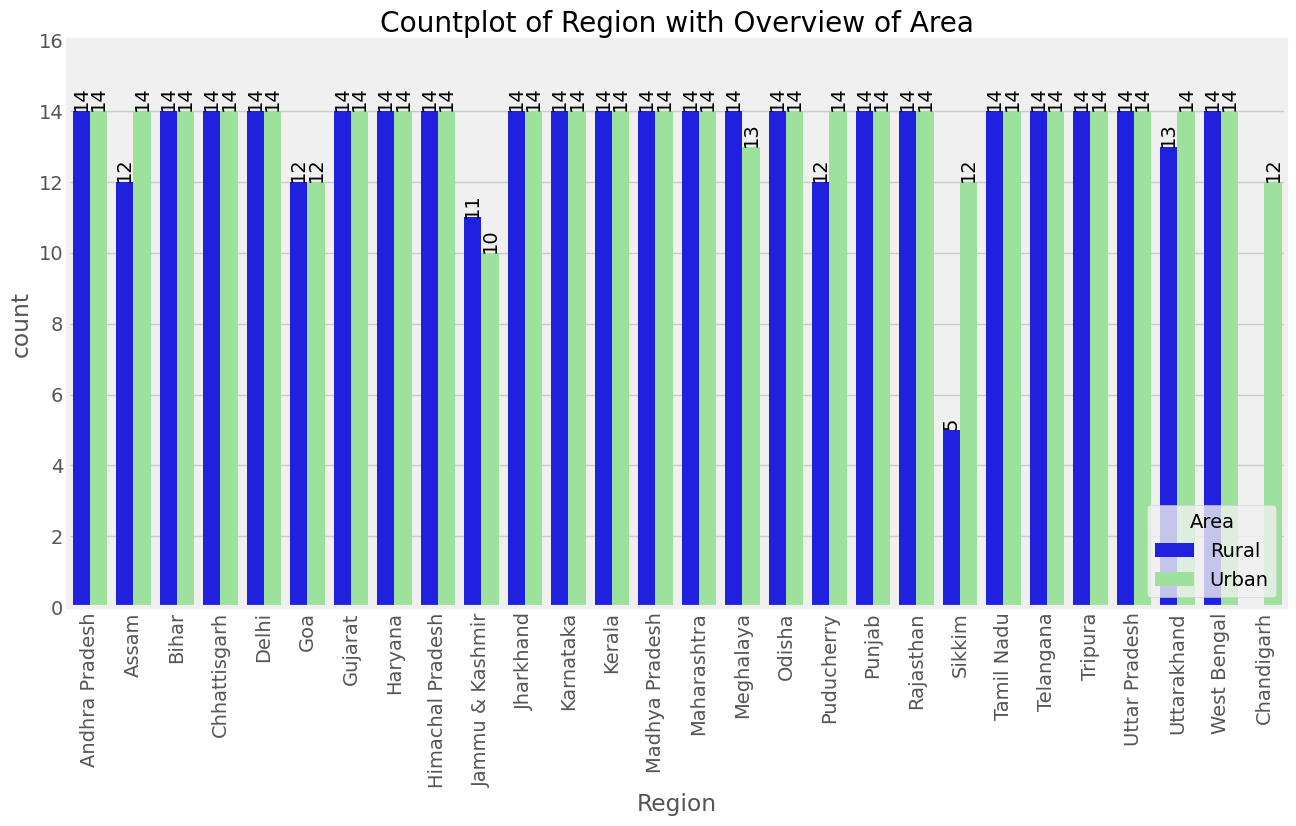

In [64]:
plt.figure(figsize=(14,7))
plt.style.use('fivethirtyeight')
ax = sns.countplot( x=df['Region'],hue = df['Area'], palette = ['blue','lightgreen'])

for x in ax.containers:
    ax.bar_label(x,rotation=90)

plt.xticks(rotation=90)
plt.ylim(0,16)
plt.title('Countplot of Region with Overview of Area')
plt.show()

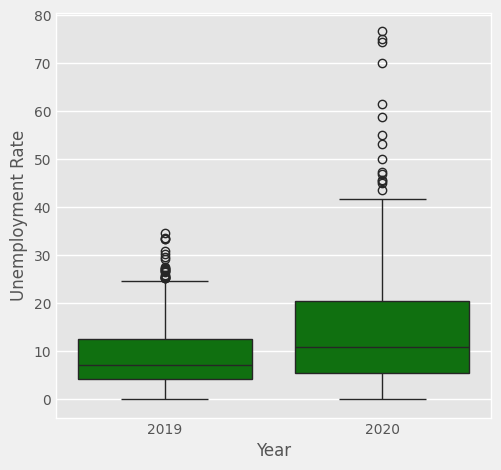

In [65]:
#Analysing the Unemployment Rate column
plt.figure(figsize=(5,5))
plt.style.use('ggplot')
sns.boxplot(y = df['Est_Unemp_Rate'], x = df['Year'], color ='green')
plt.ylabel('Unemployment Rate')
plt.show()

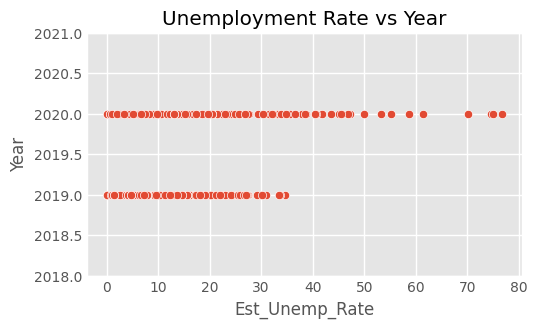

In [66]:
plt.figure(figsize=(5,3))
plt.style.use('ggplot')
sns.scatterplot(x = df['Est_Unemp_Rate'], y = df['Year'])
plt.ylim(2018,2021)
plt.title('Unemployment Rate vs Year')
plt.show()

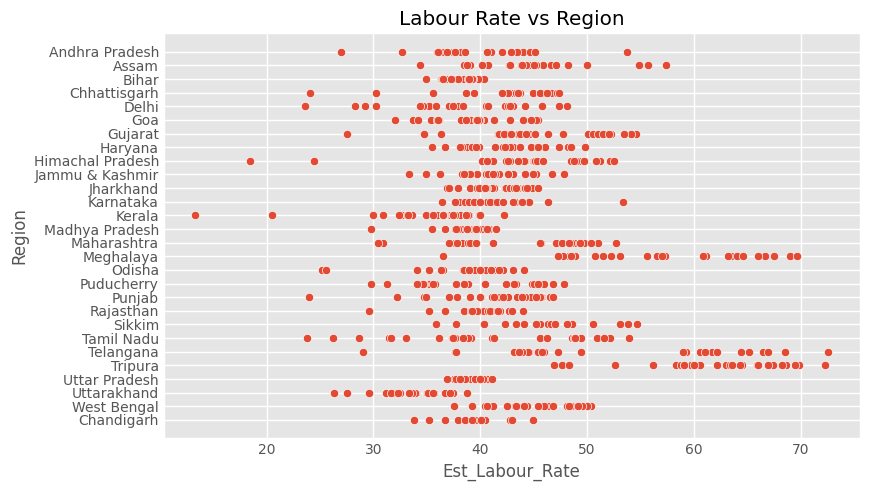

In [67]:
plt.figure(figsize=(8,5))
plt.style.use('ggplot')
sns.scatterplot(x = df['Est_Labour_Rate'], y = df['Region'])
plt.title('Labour Rate vs Region')
plt.show()

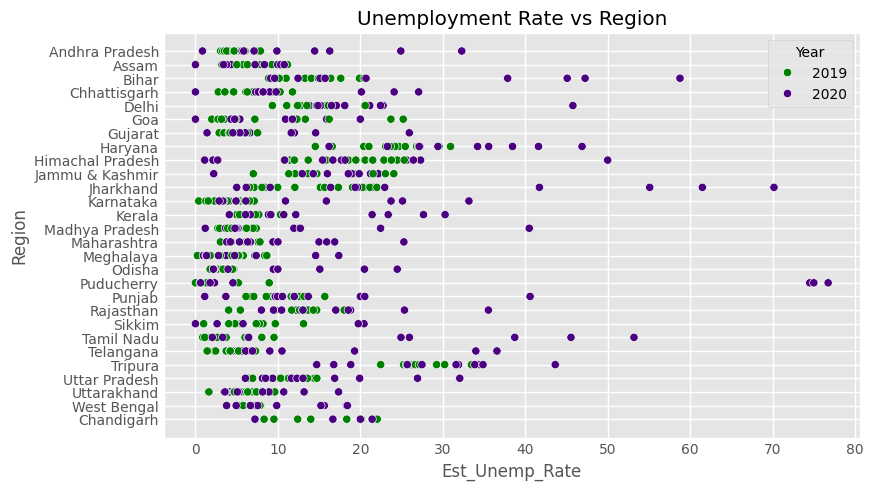

In [68]:
plt.figure(figsize=(8,5))
plt.style.use('ggplot')
sns.scatterplot(x = df['Est_Unemp_Rate'], y = df['Region'], hue = df['Year'], palette = ['green','indigo'])
plt.title('Unemployment Rate vs Region')
plt.show()

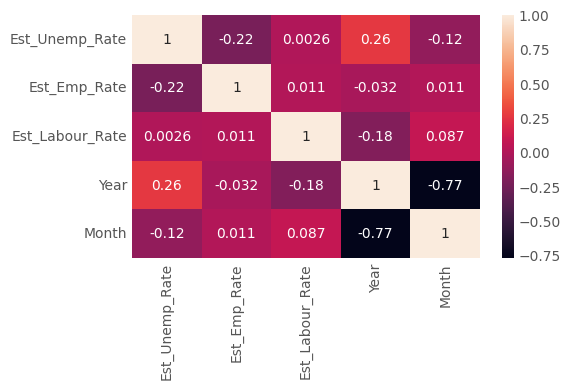

In [69]:
#Correlation heatmap
plt.figure(figsize=(5,3))
sns.heatmap(df.select_dtypes(include=['number']).corr(),annot=True)
plt.show()

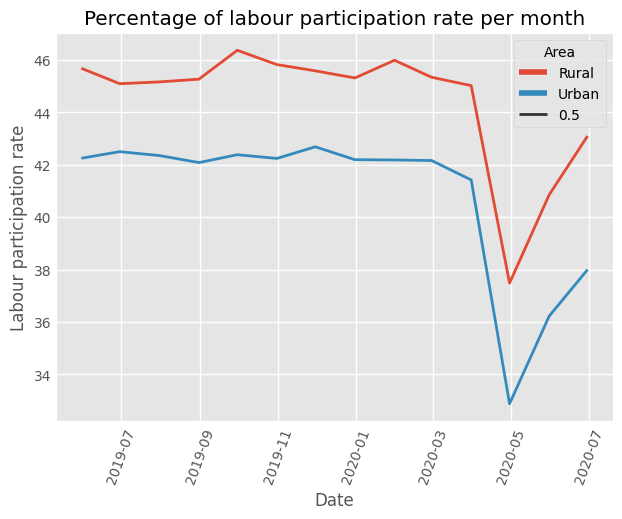

In [70]:
sns.lineplot(x = df['Date'], y = df['Est_Labour_Rate'], hue=df['Area'], errorbar=None, size = 0.5)
plt.title('Percentage of labour participation rate per month')
plt.ylabel('Labour participation rate')
plt.xticks(rotation=70)
plt.show()